In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5f/ba/607d013b55b9fd805db2a5c2662ec7551f1910b4eef39653eeaba182c5b2/torch-2.5.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/b9/f8/feced7779d755758a52d1f6635d990b8d98dc0a29fa568bbe0625f18fdf3/filelock-3.16.1-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/c6/b2/454d6e7f0158951d8a78c2e1eb4f69ae81beb8dca5fee9809c6c99e9d0d0/fsspec-2024.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath<1.4,>=1.1.0 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-no


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch
import torch.nn as nn

In [4]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [9]:
# Load the text file into a DataFrame
df = pd.read_csv("C:/Users/Mi/machine-learning-projects/AMZN.csv")
df.columns = ['timestamp', 'open', 'high', 'low','Adj Close', 'close', 'volume']
df.drop(columns=['Adj Close'], inplace=True)
df

,timestamp,open,high,low,close,volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200
...,...,...,...,...,...,...
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,2790600


In [10]:
# # Calculate the number of rows to keep (last 20%)
# trim_df_rows = int(0.5 * len(df))

# # Select the last 20% of the data
# df = df.iloc[-trim_df_rows:]

# # Reset the index if needed
# df.reset_index(drop=True, inplace=True)

# # Now, df contains only the last 20% of your data
# df

In [11]:
df = df[['timestamp', 'close']]
df

,timestamp,close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083
...,...,...
6252,2022-03-18,3225.010010
6253,2022-03-21,3229.830078
6254,2022-03-22,3297.780029
6255,2022-03-23,3268.159912


<ipython-input-36-ffbfa912c899>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


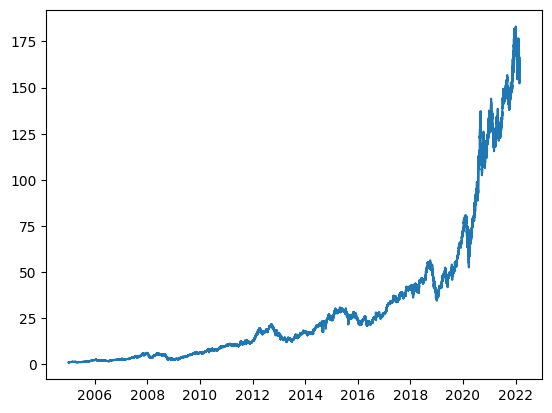

In [36]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.plot(df['timestamp'], df['close'])

In [12]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('timestamp', inplace=True)

    for i in range(1, n_steps+1):
        df[f'close(t-{i})'] = df['close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 15
shifted_df = prepare_dataframe_for_lstm(df, lookback)
shifted_df

,close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7),close(t-8),close(t-9),close(t-10),close(t-11),close(t-12),close(t-13),close(t-14),close(t-15)
timestamp,,,,,,,,,,,,,,,,
1997-06-06,1.656250,1.541667,1.416667,1.479167,1.510417,1.500000,1.505208,1.531250,1.583333,1.500000,1.395833,1.427083,1.635417,1.708333,1.729167,1.958333
1997-06-09,1.687500,1.656250,1.541667,1.416667,1.479167,1.510417,1.500000,1.505208,1.531250,1.583333,1.500000,1.395833,1.427083,1.635417,1.708333,1.729167
1997-06-10,1.583333,1.687500,1.656250,1.541667,1.416667,1.479167,1.510417,1.500000,1.505208,1.531250,1.583333,1.500000,1.395833,1.427083,1.635417,1.708333
1997-06-11,1.541667,1.583333,1.687500,1.656250,1.541667,1.416667,1.479167,1.510417,1.500000,1.505208,1.531250,1.583333,1.500000,1.395833,1.427083,1.635417
1997-06-12,1.604167,1.541667,1.583333,1.687500,1.656250,1.541667,1.416667,1.479167,1.510417,1.500000,1.505208,1.531250,1.583333,1.500000,1.395833,1.427083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,3225.010010,3144.780029,3062.080078,2947.330078,2837.060059,2910.489990,2936.350098,2785.580078,2720.290039,2749.060059,2912.820068,2957.969971,3041.050049,3022.840088,3071.260010,3075.770020
2022-03-21,3229.830078,3225.010010,3144.780029,3062.080078,2947.330078,2837.060059,2910.489990,2936.350098,2785.580078,2720.290039,2749.060059,2912.820068,2957.969971,3041.050049,3022.840088,3071.260010
2022-03-22,3297.780029,3229.830078,3225.010010,3144.780029,3062.080078,2947.330078,2837.060059,2910.489990,2936.350098,2785.580078,2720.290039,2749.060059,2912.820068,2957.969971,3041.050049,3022.840088


In [13]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[1.65625000e+00, 1.54166700e+00, 1.41666700e+00, ...,
        1.70833300e+00, 1.72916700e+00, 1.95833300e+00],
       [1.68750000e+00, 1.65625000e+00, 1.54166700e+00, ...,
        1.63541700e+00, 1.70833300e+00, 1.72916700e+00],
       [1.58333300e+00, 1.68750000e+00, 1.65625000e+00, ...,
        1.42708300e+00, 1.63541700e+00, 1.70833300e+00],
       ...,
       [3.29778003e+03, 3.22983008e+03, 3.22501001e+03, ...,
        2.95796997e+03, 3.04105005e+03, 3.02284009e+03],
       [3.26815991e+03, 3.29778003e+03, 3.22983008e+03, ...,
        2.91282007e+03, 2.95796997e+03, 3.04105005e+03],
       [3.27298999e+03, 3.26815991e+03, 3.29778003e+03, ...,
        2.74906006e+03, 2.91282007e+03, 2.95796997e+03]])

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99991063, -0.99997207, -1.        , ..., -0.99983244,
        -0.99982127, -0.99969839],
       [-0.99989388, -0.99991063, -0.99993298, ..., -0.99987154,
        -0.99983244, -0.99982127],
       [-0.99994973, -0.99989388, -0.99987154, ..., -0.99998324,
        -0.99987154, -0.99983244],
       ...,
       [ 0.76748571,  0.73105064,  0.72847141, ...,  0.58528846,
         0.62983525,  0.62007123],
       [ 0.75160327,  0.76748571,  0.7310559 , ...,  0.56107949,
         0.58528846,  0.62983525],
       [ 0.75419318,  0.75160327,  0.76749026, ...,  0.47327284,
         0.56107949,  0.58528846]])

In [15]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((6242, 15), (6242,))

In [16]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99969839, -0.99982127, -0.99983244, ..., -0.99996649,
        -1.        , -0.99997207],
       [-0.99982127, -0.99983244, -0.99987154, ..., -1.        ,
        -0.99993298, -0.99991063],
       [-0.99983244, -0.99987154, -0.99998324, ..., -0.99993298,
        -0.99987154, -0.99989388],
       ...,
       [ 0.62007123,  0.62983525,  0.58528846, ...,  0.68545258,
         0.72847141,  0.73105064],
       [ 0.62983525,  0.58528846,  0.56107949, ...,  0.72847141,
         0.7310559 ,  0.76748571],
       [ 0.58528846,  0.56107949,  0.47327284, ...,  0.7310559 ,
         0.76749026,  0.75160327]])

In [17]:
split_index = int(len(X) * 0.65)

split_index

4057

In [18]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4057, 15), (2185, 15), (4057,), (2185,))

In [19]:
lookback

15

In [20]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4057, 15, 1), (2185, 15, 1), (4057, 1), (2185, 1))

In [21]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([4057, 15, 1]),
 torch.Size([2185, 15, 1]),
 torch.Size([4057, 1]),
 torch.Size([2185, 1]))

In [22]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [23]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [24]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 15, 1]) torch.Size([16, 1])


In [25]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [26]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [27]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [28]:
learning_rate = 0.01
num_epochs = 3
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.136
Batch 200, Loss: 0.001

Val Loss: 0.706
***************************************************

Epoch: 2
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001

Val Loss: 0.688
***************************************************

Epoch: 3
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001

Val Loss: 0.668
***************************************************



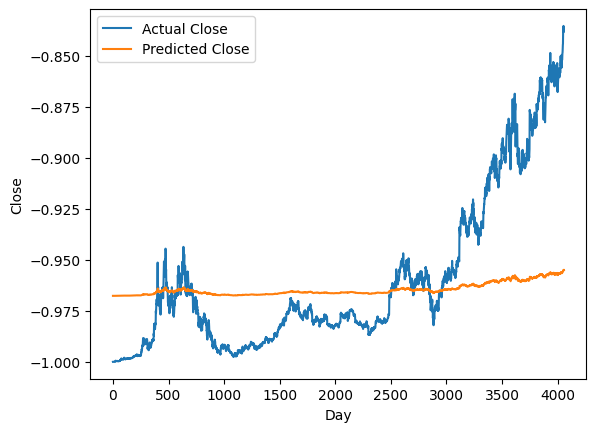

In [29]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [30]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([61.90964601, 61.91787187, 61.92053972, ..., 85.64281216,
       85.31066522, 85.38358637])

In [31]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([  1.65621227,   1.68744831,   1.58329112, ..., 304.11001703,
       305.22995693, 303.47996051])

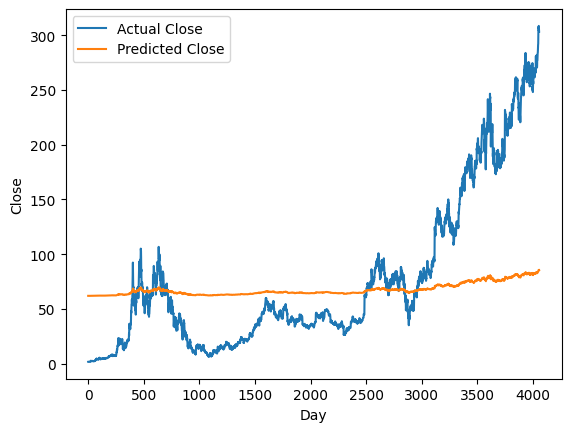

In [32]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [33]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([ 85.256419  ,  85.070559  ,  84.90248464, ..., 527.16825295,
       544.30216628, 546.28804483])

In [34]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([ 301.06000104,  298.93995203,  303.40003627, ..., 3297.78007532,
       3268.1598603 , 3272.98999714])

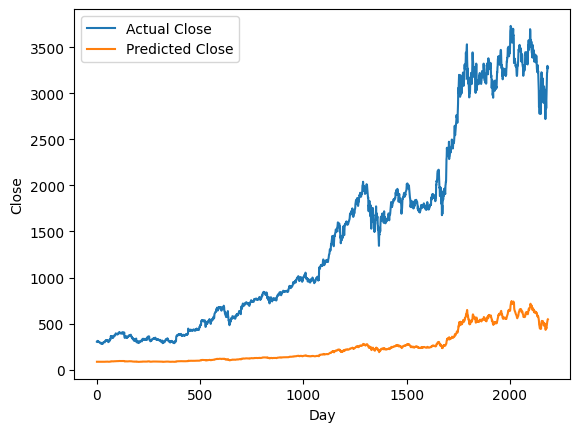

In [35]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()